# Piecewise Affine Superposition Arithmetic for Factorable Functions

A superposition relaxation of the function $f:\mathcal{X}\to\mathbb{R}$ on the convex domain $\mathcal{X}\subseteq \mathbb{R}^n$ is a pair of functions $f^{\rm u},f^{\rm o}:\mathcal{X}\subseteq \mathbb{R}^n$ that (i) are separable,
\begin{align*}
\forall {\bf x}\in\mathcal{X}, \quad f^{\rm u}({\bf x}) \coloneqq \sum_{i=1}^n f_i^{\rm u}(x_i) \quad\ \text{and} \quad f^{\rm o}({\bf x}) \coloneqq \sum_{i=1}^n f_i^{\rm u}(x_i),
\end{align*}
and (ii) bracket the variations of $f$ on $\mathcal{X}$,
\begin{align*}
\forall {\bf x}\in\mathcal{X}, \quad f^{\rm u}({\bf x}) \leq f({\bf x}) \leq f^{\rm o}({\bf x}).
\end{align*}
The modules `ASModel` and `ASVar` in PyMC provide a means of computing such superposition relaxations for multivariate factorable functions on interval domains $\mathcal{X}\in\mathbb{IR}^n$, where the univariate function components, $f_i^{\rm u}$ and $f_i^{\rm o}$ are continuous piecewise-affine functions.

## Computing Piecewise Affine Superposition Relaxations in PyMC

Suppose we want to compute a piecewise affine superposition relaxation of the real-valued function $f(x,y)=\text{ReLU}(x,y)$ for $(x,y)\in [-2,1]\times[-1,2]$. 

We start by importing the PyMC library and defining a superposition model environment with two independent variables:

In [1]:
import pymc

N = 2
mod = pymc.ASModel(N)

Then, we proceed by defining the ranges of both variables $x$ and $y$ (cf. [Other notebook](./interval.ipynb)):, and also initialize the affine superposition for $x$ and $y$ of type `pymc.ASVar` with indices `0` and `1`, respectively, in the superposition model environment `mod`:

In [2]:
xI, yI = pymc.Interval(-2,1), pymc.Interval(-1,2)
xAS, yAS = pymc.ASVar( mod, 0, xI ), pymc.ASVar( mod, 1, yI )

print(xAS)
print(yAS)

This ASVar is affine : 
  cst        [ -2.0000000000000000e+00 :  1.0000000000000000e+00 ]  
0.0000000000000000e+00      + 1.0000000000000000e+00 * x_0

This ASVar is affine : 
  cst        [ -1.0000000000000000e+00 :  2.0000000000000000e+00 ]  
0.0000000000000000e+00      + 1.0000000000000000e+00 * x_1



With operator overloading, we can simply compute a piecewise affine superposition relaxation of $f(x,y)=\text{ReLU}(x+y)$ on $[−2,1]\times[−1,2]$ as:

In [3]:
#zAS = pymc.relu( xAS + yAS ) + 0.5 * pymc.relu( xAS ) + 0.5 * pymc.relu( yAS )
zAS = pymc.relu( xAS + yAS )
print( "superposition relaxation:", zAS )

superposition relaxation: Var No.0: 
 the PWL under-estimator is the constant 0.00000000000000e+00 on [-2.00000000000000e+00, 1.00000000000000e+00]

 the PWL over-estimator:
No.:      1,       2,       3,  
  x: -2.00000000000000e+00,  -5.00000000000000e-01,  1.00000000000000e+00,  
  y: 0.00000000000000e+00,  0.00000000000000e+00,  1.50000000000000e+00,  

[LB, UB]: [0.00000000000000e+00, 1.50000000000000e+00]

Var No.1: 
 the PWL under-estimator is the constant 0.00000000000000e+00 on [-1.00000000000000e+00, 2.00000000000000e+00]

 the PWL over-estimator:
No.:      1,       2,       3,  
  x: -1.00000000000000e+00,  5.00000000000000e-01,  2.00000000000000e+00,  
  y: 0.00000000000000e+00,  0.00000000000000e+00,  1.50000000000000e+00,  

[LB, UB]: [0.00000000000000e+00, 1.50000000000000e+00]

    B: [  0.0000000000000000e+00 :  3.0000000000000000e+00 ]



The overall bound of the superposition relaxation can be retrieved in the field `B`, or indiviual lower and upper bounds in the fields `l` and `u`: 

In [4]:
print("superposition bound:", zAS.B)
print("superposition lower/upper bounds:", zAS.l, zAS.u)

superposition bound: [  0.0000000000000000e+00 :  3.0000000000000000e+00 ]
superposition lower/upper bounds: 0.0 3.0


Likewise, the superposition bounds at given points of the domain can be retrieved using the method `R`:

In [5]:
print("superposition relaxation at point (0.5,0.5):", zAS.R([0.5,0.5]))

superposition relaxation at point (0.5,0.5): [  0.0000000000000000e+00 :  1.0000000000000000e+00 ]


A 3d plot showing both the underestimator and overestimator in the superposition relaxation of the function $f$ over the domain $[-2,1]\times[-1,2]$ is constructed below. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

M = 64
matx = np.outer(np.linspace(xI.l, xI.u, M), np.ones(M))
maty = np.outer(np.ones(M), np.linspace(yI.l, yI.u, M))
#matf = pymc.maximum( matx+maty, np.zeros(shape=(M,M)) )

In [7]:
matf  = np.ndarray(shape=(M,M))
matfu = np.ndarray(shape=(M,M))
matfo = np.ndarray(shape=(M,M))

for i,j in product(range(M),range(M)):
  matf[i,j] = pymc.relu(matx[i,j]+maty[i,j])
  zR = zAS.R([matx[i,j],maty[i,j]])
  matfu[i,j], matfo[i,j] = zR.l, zR.u
#print( matf )
#print( matfu )
#print( matfo )

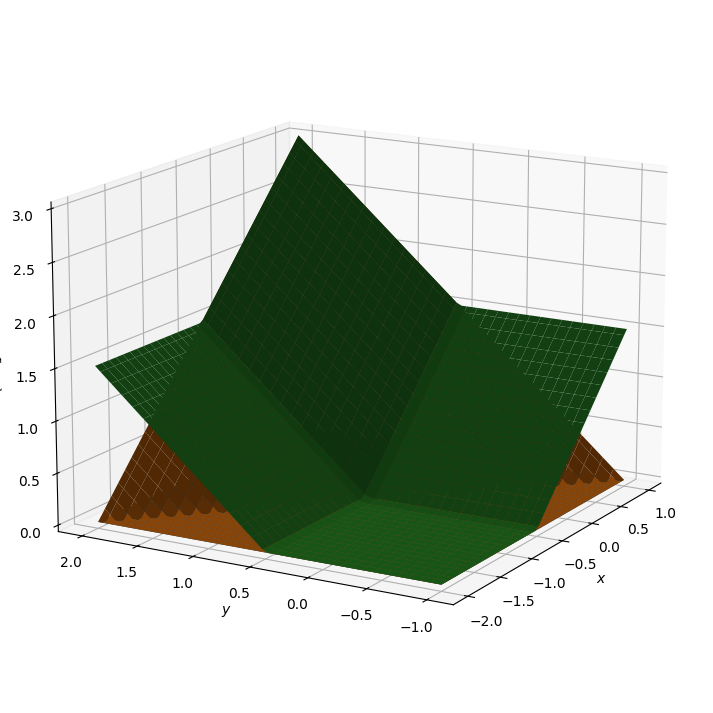

In [8]:
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')

ax.plot_surface(matx, maty, matfu)
ax.plot_surface(matx, maty, matf)
ax.plot_surface(matx, maty, matfo)
ax.view_init(elev=15, azim=-150)

plt.show()